In [239]:
from keras.models import load_model
# load model after export
model = load_model('my_model.h5')

In [240]:
import pickle

X_train = pickle.load(open("../pickle/X_train.sav", 'rb'))
X_test = pickle.load(open("../pickle/X_test.sav", 'rb'))
Y_train = pickle.load(open("../pickle/Y_train.sav", 'rb'))
Y_test = pickle.load(open("../pickle/Y_test.sav", 'rb'))

In [241]:
predictions = model.predict([X_test])
print(predictions)

[[1.61280525e-07 1.05003348e-08 2.30661772e-05 ... 5.25924504e-09
  9.99828219e-01 3.92729731e-07]
 [7.47087103e-09 9.99997377e-01 3.79428002e-07 ... 5.33140856e-08
  8.15990617e-08 5.32843991e-08]
 [5.94342220e-09 4.11770097e-11 1.84806233e-08 ... 2.77950730e-05
  7.89817207e-08 9.99870539e-01]
 ...
 [1.35309444e-08 2.13908493e-06 4.30272792e-07 ... 5.27314296e-06
  1.35069595e-05 1.10112069e-07]
 [9.99693036e-01 2.43369191e-09 9.11272934e-07 ... 9.13854237e-09
  5.11164373e-08 1.55731715e-04]
 [6.48943954e-11 3.65508523e-15 5.30903044e-10 ... 3.99165060e-07
  9.81693162e-08 9.99995947e-01]]


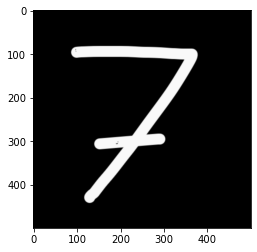

In [242]:
# pip install opencv_python
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../img/img.png')
plt.imshow(img)

In [243]:
img.shape

(500, 500, 3)

In [244]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 500)

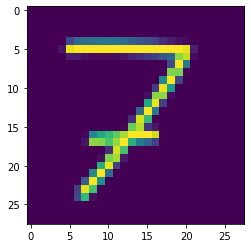

In [245]:
resize = cv2.resize(gray, (28,28),interpolation=cv2.INTER_AREA)
resize.shape
plt.imshow(resize)

In [246]:
import tensorflow as tf
import numpy as np

IMG_SIZE = 28

new_img = tf.keras.utils.normalize(resize,axis=1)
new_img = np.array(new_img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
new_img.shape

(1, 28, 28, 1)

In [247]:
pred = model.predict(new_img)
pred

array([[6.0277293e-06, 6.6298053e-02, 7.0422566e-01, 1.2117247e-05,
        4.5007789e-03, 1.1865110e-07, 3.1913538e-04, 2.7960941e-02,
        1.9666040e-01, 1.6785727e-05]], dtype=float32)

In [248]:
print(np.argsort(pred))


[[5 0 3 9 6 4 7 1 8 2]]


(1, 26, 26, 64)


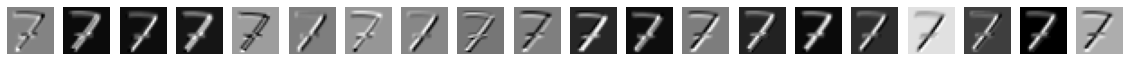

In [249]:
batch = new_img
conv = model.layers[0]
activation = conv(batch)
# print(batch)
print(conv)
print(activation.shape)

import matplotlib.pyplot as plt

n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(20):
    # get the filters
    f = activation[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(1,20,ix)
        plt.axis('off')
        plt.imshow(f[j,:,:] ,cmap='gray')
        ix+=1
# save the fig
plt.savefig("../img/fig/Conv2D_1.png")
# plot the fig
plt.show()


(1, 26, 26, 64)


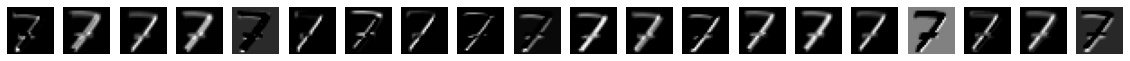

In [250]:
conv1 = model.layers[1]
activation1 = conv1(activation)
# print(batch)
print(conv1)
print(activation1.shape)

import matplotlib.pyplot as plt

n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(20):
    # get the filters
    f = activation1[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(1,20,ix)
        plt.axis('off')
        plt.imshow(f[j,:,:] ,cmap='gray')
        ix+=1
# save the fig
plt.savefig("../img/fig/Activation_1.png")
# plot the fig
plt.show()



(1, 13, 13, 64)


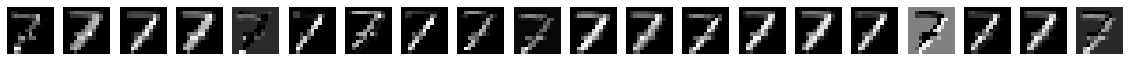

In [251]:
conv2 = model.layers[2]
activation2 = conv2(activation1)
# print(batch)
print(conv2)
print(activation2.shape)

import matplotlib.pyplot as plt

n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(20):
    # get the filters
    f = activation2[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(1,20,ix)
        plt.axis('off')
        plt.imshow(f[j,:,:] ,cmap='gray')
        ix+=1
# save the fig
plt.savefig("../img/fig/MaxPooling2D_1.png")
# plot the fig
plt.show()

(1, 11, 11, 64)


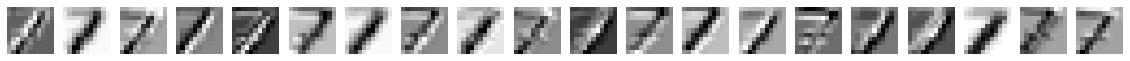

In [252]:
conv3 = model.layers[3]
activation3 = conv3(activation2)
# print(batch)
print(conv3)
print(activation3.shape)

import matplotlib.pyplot as plt

n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(20):
    # get the filters
    f = activation3[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(1,20,ix)
        plt.axis('off')
        plt.imshow(f[j,:,:] ,cmap='gray')
        ix+=1
# save the fig
plt.savefig("../img/fig/Conv2D_2.png")
# plot the fig
plt.show()

(1, 11, 11, 64)


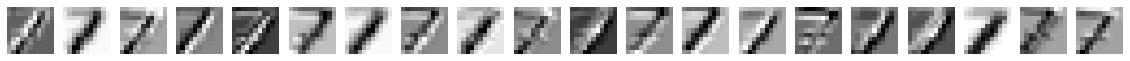

In [253]:
conv4 = model.layers[4]
activation4 = conv4(activation3)
# print(batch)
print(conv4)
print(activation4.shape)

import matplotlib.pyplot as plt

n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(20):
    # get the filters
    f = activation3[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(1,20,ix)
        plt.axis('off')
        plt.imshow(f[j,:,:] ,cmap='gray')
        ix+=1
# save the fig
plt.savefig("../img/fig/Activation_2.png")
# plot the fig
plt.show()

(1, 5, 5, 64)


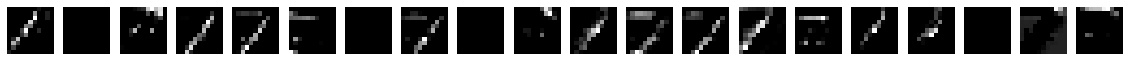

In [254]:
conv5 = model.layers[5]
activation5 = conv5(activation4)
# print(batch)
print(conv5)
print(activation5.shape)

import matplotlib.pyplot as plt

n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(20):
    # get the filters
    f = activation4[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(1,20,ix)
        plt.axis('off')
        plt.imshow(f[j,:,:] ,cmap='gray')
        ix+=1
# save the fig
plt.savefig("../img/fig/MaxPooling2D_2.png")
# plot the fig
plt.show()

(1, 5, 5, 64)


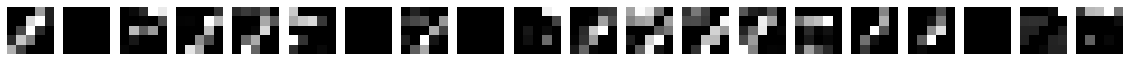

In [255]:
conv6 = model.layers[4]
activation6 = conv6(activation5)
# print(batch)
print(conv6)
print(activation6.shape)

import matplotlib.pyplot as plt

n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(20):
    # get the filters
    f = activation5[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        plt.subplot(1,20,ix)
        plt.axis('off')
        plt.imshow(f[j,:,:] ,cmap='gray')
        ix+=1
# save the fig
plt.savefig("../img/fig/Activation_3.png")
# plot the fig
plt.show()